## Minor Project : Bicyle Sharing System Demand Forecast

Created by : Kuldip Bhimani

Dataset from www.kaggel.com

1. We will first explore the dataset provided
2. We will create models to predict the hourly bike rental demand. 
3. We will also make predictions for hourly demand in the test set which you can submit in the solution_checker.xlsx file to generate rmsle score.

Importing Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sn

import datetime

In [2]:
train = pd.read_csv('train.csv', parse_dates = ['datetime'])
train.shape

(12980, 12)

In [3]:
test = pd.read_csv('test.csv', parse_dates = ['datetime'])
test.shape

(4399, 11)

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [5]:
test.head()   # target variable count is no here - good

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 01:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 02:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 03:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 04:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 05:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [31]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [32]:
test.columns  

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

We can infer that "count" is our target variable as it is missing from the test dataset.

In [33]:
train.info()  # here datetime is only object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12980 entries, 0 to 12979
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    12980 non-null  datetime64[ns]
 1   season      12980 non-null  int64         
 2   holiday     12980 non-null  int64         
 3   workingday  12980 non-null  int64         
 4   weather     12980 non-null  int64         
 5   temp        12980 non-null  float64       
 6   atemp       12980 non-null  float64       
 7   humidity    12980 non-null  float64       
 8   windspeed   12980 non-null  float64       
 9   casual      12980 non-null  int64         
 10  registered  12980 non-null  int64         
 11  count       12980 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 1.2 MB


In [34]:
test.info()  # datetime object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4399 entries, 0 to 4398
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    4399 non-null   datetime64[ns]
 1   season      4399 non-null   int64         
 2   holiday     4399 non-null   int64         
 3   workingday  4399 non-null   int64         
 4   weather     4399 non-null   int64         
 5   temp        4399 non-null   float64       
 6   atemp       4399 non-null   float64       
 7   humidity    4399 non-null   float64       
 8   windspeed   4399 non-null   float64       
 9   casual      4399 non-null   int64         
 10  registered  4399 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(6)
memory usage: 378.2 KB


In [6]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There is no null value in train dataset

In [7]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

There is no null value in test dataset

In [8]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2.211479,0.027504,0.685978,1.426656,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
std,1.053046,0.163553,0.464143,0.647955,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,2.000000,0.000000,1.000000,1.000000,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000


array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>],
       [<AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

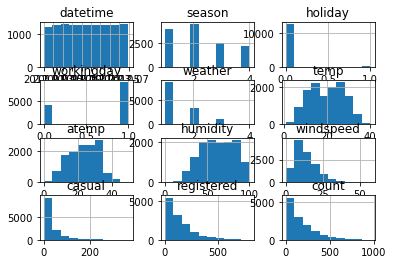

In [9]:
pd.DataFrame.hist(data = train)

## Variable Analysis 

### Univariare

count is target variable
we see it's distribution by histogram

C:\Users\kuldi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

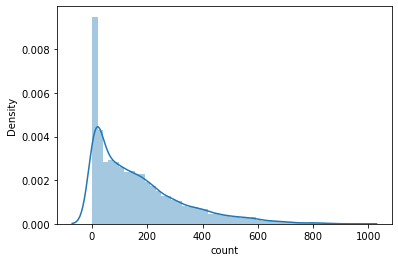

In [10]:
sn.distplot(train["count"])

it is right skewed distribution, let's try log

C:\Users\kuldi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

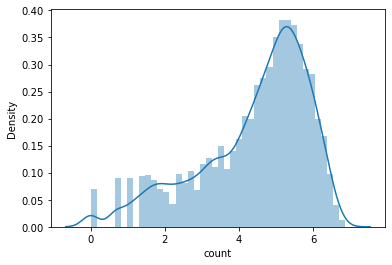

In [11]:
sn.distplot(np.log(train["count"]))

Now it is less skewed then above. So we'll take log of count in account.

C:\Users\kuldi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='registered', ylabel='Density'>

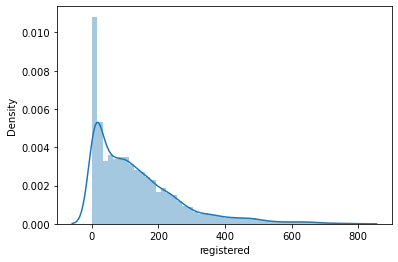

In [12]:
# for registerd users

sn.distplot(train["registered"])

### Bivariate

In [42]:
# we'll check the correlation of continuous variable

train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,-0.010959,0.014343,-0.013005,0.394560,0.397765,0.181712,-0.135762,0.104657,0.085699,0.100687
holiday,-0.010959,1.000000,-0.248558,-0.018406,-0.025104,-0.032903,-0.029520,0.021646,0.029135,-0.046053,-0.029340
workingday,0.014343,-0.248558,1.000000,0.052788,0.060589,0.064840,0.028026,0.001986,-0.307930,0.131819,0.018842
weather,-0.013005,-0.018406,0.052788,1.000000,-0.093655,-0.094877,0.432497,0.011120,-0.161752,-0.139034,-0.161018
temp,0.394560,-0.025104,0.060589,-0.093655,1.000000,0.991839,-0.048478,-0.008669,0.459414,0.344451,0.415938
atemp,0.397765,-0.032903,0.064840,-0.094877,0.991839,1.000000,-0.031606,-0.049997,0.454015,0.342345,0.412644
humidity,0.181712,-0.029520,0.028026,0.432497,-0.048478,-0.031606,1.000000,-0.296975,-0.320253,-0.279501,-0.322269
windspeed,-0.135762,0.021646,0.001986,0.011120,-0.008669,-0.049997,-0.296975,1.000000,0.079524,0.100579,0.105607
casual,0.104657,0.029135,-0.307930,-0.161752,0.459414,0.454015,-0.320253,0.079524,1.000000,0.509175,0.707938
registered,0.085699,-0.046053,0.131819,-0.139034,0.344451,0.342345,-0.279501,0.100579,0.509175,1.000000,0.968329


<AxesSubplot:>

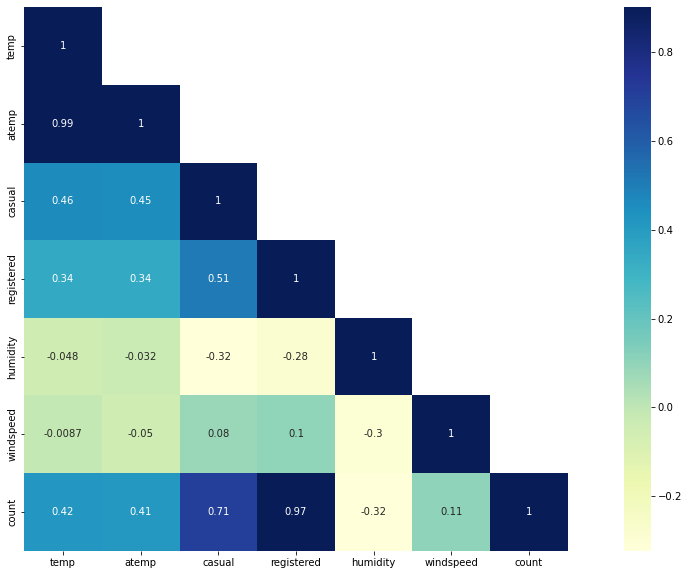

In [13]:
corr = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

Here we have noted:
1. temp and atemp have little corrilation with season.
2. temp and atemp are highly corrilated. so will drop one of this in our furtur calculation to avoind multi lineariity.
3. Humidity and weather have littel corrilation.
4. windspeed have negligible corrilation with other variables.
5. casual have little corrilation with tem/atemp and registerd. good corrilation with count.
6. registered and count have a high correlation.

## Model Building

### Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

Datetime is object type it can't be fit in linearregression. so we'll extract it's value as per our prediction's requirement.

In [16]:
import datetime

In [17]:
train['date_month_no'] = train['datetime'].dt.month
train['date_day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour


train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date_month_no,date_day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1,1,1,4


In [18]:
test['date_month_no'] = test['datetime'].dt.month
test['date_day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour


test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,date_month_no,date_day,hour
0,2012-06-30 01:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55,6,30,1
1,2012-06-30 02:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54,6,30,2
2,2012-06-30 03:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20,6,30,3
3,2012-06-30 04:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15,6,30,4
4,2012-06-30 05:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7,6,30,5


Now, We'll drop datetime, atemp from both data. and also drop count from train data and pass it to the separate variable.

In [19]:
X = train.drop(['count','datetime','atemp'], axis = 1)
y = np.log(train['count'])    # as we see in above histogram count have skewedness toward right so we have take it's log

Split our dataset for train and test for model.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

Now, We'll fit the data into our Linear Regression model. with it's object lr which we have created.

In [22]:
lr.fit(X_train, y_train)

LinearRegression()

Now, We'll predict on our model.

In [23]:
y_pred = lr.predict(X_test)

In [24]:
y_pred

array([2.86270463, 4.50664186, 4.68200783, ..., 3.40642273, 2.46094602,
       5.64793264])

Check r2 score for the model.

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(y_test, y_pred)

0.7166954880839476

We'll save the predection value and check it with our solution checker.

Before it we need to drop datetime and atemp from test to fitting in model

In [27]:
test = test.drop(['datetime','atemp'], axis = 1)
test.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,date_month_no,date_day,hour
0,3,0,0,3,26.24,89.0,15.0013,3,55,6,30,1
1,3,0,0,2,26.24,89.0,0.0000,7,54,6,30,2
2,3,0,0,2,26.24,89.0,0.0000,3,20,6,30,3
3,3,0,0,2,25.42,94.0,0.0000,3,15,6,30,4
4,3,0,0,1,26.24,89.0,11.0014,3,7,6,30,5


In [28]:
lr_test_pred = lr.predict(test)
lr_test_pred

array([3.31871301, 3.3488598 , 3.17420754, ..., 4.36240491, 4.23308214,
       4.18496318])

lr_test_pred values are log value. we need to take off log for actual value.

In [29]:
lr_final_pred = np.exp(lr_test_pred)
lr_final_pred

array([27.62477477, 28.47025341, 23.90786641, ..., 78.44556197,
       68.92935474, 65.69108221])

We save our prediction: lr_final_pred to csv file and check with solution checker.

In [30]:
lr_pred = pd.DataFrame()

In [31]:
lr_pred['count'] = lr_final_pred

In [32]:
lr_pred.to_csv('lr_pred.csv', header = True, index = False)


Prediction : lr_pred gives 0.803 rmsle score in solution checker.
RMSLE score nears 0 is better.

We'll try DecisionTree model for better RMSLE score.

### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
# Creating object for DecisionTree

dt = DecisionTreeRegressor(max_depth = 6)      #hypermeter max_dept = 6, change it according to model fit.

Fit the data into object.

In [50]:
dt.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=6)

Let's make prediction on dt.

In [51]:
Y_pred = dt.predict(X_test)

In [52]:
Y_pred

array([0.        , 4.17610658, 4.83061069, ..., 2.82563278, 2.20770906,
       5.68957395])

Remember above is log value.

In [43]:
dt_test_pred = dt.predict(test)

In [44]:
dt_test_pred

array([4.17610658, 4.17610658, 3.04186168, ..., 4.50740604, 4.05133757,
       4.05133757])

Above prediction values are log value. we take off log for actual value.

In [45]:
dt_final_pred = np.exp(dt_test_pred)

In [46]:
dt_final_pred

array([65.11185122, 65.11185122, 20.94419838, ..., 90.68627655,
       57.4742813 , 57.4742813 ])


We'll save dt_final_pred values to csv file and check it with solution checker for our score.

In [47]:
dt_pred = pd.DataFrame()

In [48]:
dt_pred['count'] = dt_final_pred

In [49]:
dt_pred.to_csv('dt_pred.csv', header = True, index = False)

In solution checker we got RSMLE score 0.103 for dt_pred values which is near to 0 then lr_pred values.
Decision Tree is good fited model for our prediction.